In [1]:
library(readr)
library(SCDC)
library(gprofiler2)
library(dplyr)
library(Seurat)
library(tidyr)
library(dplyr)
library(ggplot2)
library(viridis)
library(hrbrthemes)

Warning message:
“package ‘SCDC’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Attaching sp



In [2]:
df_corps <- readr::read_tsv("/work/project/fragencode/workspace/plus4pigs/results/corps_emb/quantification/reference_genes_TPM.tsv")

Rows: 35670 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): gene
dbl (3): EB_J7.1_2, EB_J7.1_5, EB_J9.5_6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
metadata <- read.csv(file = "/home/adufour/work/table/embryoid_body.csv")

In [4]:
gene_convert <- gconvert(query = df_corps$gene, organism = "sscrofa",
target="ENSG", mthreshold = 1, filter_na = TRUE)

In [5]:
df_corps$gene <- gene_convert$name

In [6]:
df_corps <- as.data.frame(df_corps)

In [7]:
df_corps <- aggregate(df_corps[,-1], list(gene=df_corps[,1]), FUN = sum)

In [8]:
rownames(df_corps) <- df_corps$gene

In [9]:
df_corps <- df_corps[,-1]

In [11]:
eset <- getESET(df_corps, fdata = rownames(df_corps), pdata = metadata)

In [12]:
reference <- readRDS("/work/project/fragencode/workspace/plus4pigs/data/melim/pig_atlas_20221014.rds")

In [13]:
matrix <- GetAssayData(object = reference, slot = "counts")

In [44]:
rownames(matrix) <- matrix$Row.names

In [47]:
matrix <- matrix[,-1]

In [50]:
eset.sc <- getESET(matrix, fdata = rownames(matrix), pdata = reference@meta.data)

In [54]:
celltype_list <- c("Hepatocytes", "Endothelial cells", "Erythroid cells", "Plasma cells", "Cardiomyocytes", "Fibroblasts", "Ureteric epithelial cells",
"Proximal tubule cells", "Collecting duct cells", "Distal convoluted tubule cells", "Podocytes",
"Cycling cells", "Smooth muscle cells", "Mesenchymal cells", "Beige adipocytes", "Mast cells", "Excitatory neurons",
"Oligodendrocytes", "Inhibitory neurons", "Astrocytes", "Neural progenitor cells", "Oligodendrocyte progenitor cells", "Purkinje cells",
"Granule cells", "Newly formed oligodendrocytes", "Rod photoreceptor cells", "Retinal ganglion cells", "Bipolar cells", "Cone photoreceptor cells",
"Muller glia", "Transient amplifying cells", "Enterocytes", "Hepatic stellate cells", "Cholangiocytes", "Clara cells",
"Ciliated cells", "Megakaryocytes", "Others", "Goblet", "Tuft", "Paneth", "Stem", "Loop of Henle's cells")

In [55]:
bulkseger.scxin <- SCDC_prop(bulk.eset = eset, sc.eset = eset.sc, ct.varname = "Celltype",
                             sample = "Platform", ct.sub = celltype_list)

Warning message in min(zz[zz > 0]):
“aucun argument trouvé pour min ; Inf est renvoyé”
Creating Basis Matrix adjusted for maximal variance weight

Used 15411 common genes...

Used 48 cell types in deconvolution...

EB_J7.1_2 has common genes 14668 ...

WNNLS Converged at iteration 34

EB_J7.1_5 has common genes 14723 ...

WNNLS Converged at iteration 22

EB_J9.5_6 has common genes 14720 ...

WNNLS Converged at iteration 30



In [56]:
result_table <- as.data.frame(bulkseger.scxin$prop.est.mvw)

In [61]:
result_table$Sample <- rownames(result_table)

In [82]:
color_list <- c('ICM' = '#FFC312', 'TE Ea' = '#C4E538', 'TE In1' = '#12CBC4', 'HYPO In' = '#FDA7DF', 'HYPO Ma' = '#ED4C67', 'Epiblast' = '#FFC312', 'TE In2' = '#D980FA',
  'TE Lr' = '#6F1E51', 'HYPO Ea' = '#D980FA', 'TE Mt' = '#B53471', 'HYPO Ve' = '#EE5A24', 'TE Ma1' = '#c7ecee', 'TE Ma2' = '#FDA7DF', 'TE Il1' = '#9980FA', 
  'Mesendoderm' = '#833471', "Trophoblast" = "#3565A7", "Amnion" = "#5891BF", "Anterior Surface Ectoderm" = "#D3F1FD", "Posterior Surface Ectoderm" = "#C1DDBB",
  "Brain" = "#92CBC1", "Spinal Cord" = "#2B645E", "Epiblast 1" = "#D5BF9E", "Epiblast 2" = "#E8D6A8", "Epiblast 3" = "#F8EAB0", "Epiblast 4" = "#CAD2CE", "PGC" = "#8249B4",
  "Anterior Primitive Streak/Node" = "#FFF478", "Definitive Endoderm" = "#E6FFA6", "Gut/Hypoblast" = "#AFE76A", "Hypoblast" = "#61B62B", "ExE Endoderm" = "#327D21",
  "Primitive streak 1" = "#FFE173", "Primitive Streak 2" = "#FBAD54", "Primitive Streak 3" = "#FFCD8B", "Nascent Mesoderm 1" = "#EE7C54", "Nascent Mesoderm 2" = "#F99878",
  "Mixed Mesoderm" = "#F4192B", "Posterior Mixed mesoderm" = "#B81828", "ExE Mesoderm 1" = "#821825", "ExE Mesoderm 2" = "#A2545E", "Somitic Mesoderm" = "#F9D1EE",
  "Presomitic Mesoderm" = "#E076C5", "Pharyngeal Mesoderm 1" = "#E0057A", "Pharyngeal Mesoderm 2" = "#F3A0CC", "Intermediate Mesoderm 1" = "#ff624a", 
  "Intermediate Mesoderm 2" = "#EE71B6", "Haematoendothelial Progenitors" = "#8F4986", "Blood Progenitors" = "#590D57", "Mesenchyme 1" = "#1b0840",
  "Mesenchyme 2" = "#430707", "Mesenchyme 3" = "#724545", "Allantois" = "#AE1667", "Cardiac Mesoderm" = "#000000", "Neural Ectoderm" = "#c7d0cb",
  "Pharyngeal Mesoderm" = "#e10578", "Caudal Epiblast" = "#97c9c3", "Intermediate mesoderm 2" = "#f86cb6", "Lateral Plate Mesoderm" = "#fff676")

In [84]:
result_to_plot <-result_table %>%
  pivot_longer(cols = 0:43) %>%
  filter_all(any_vars(value != 0))

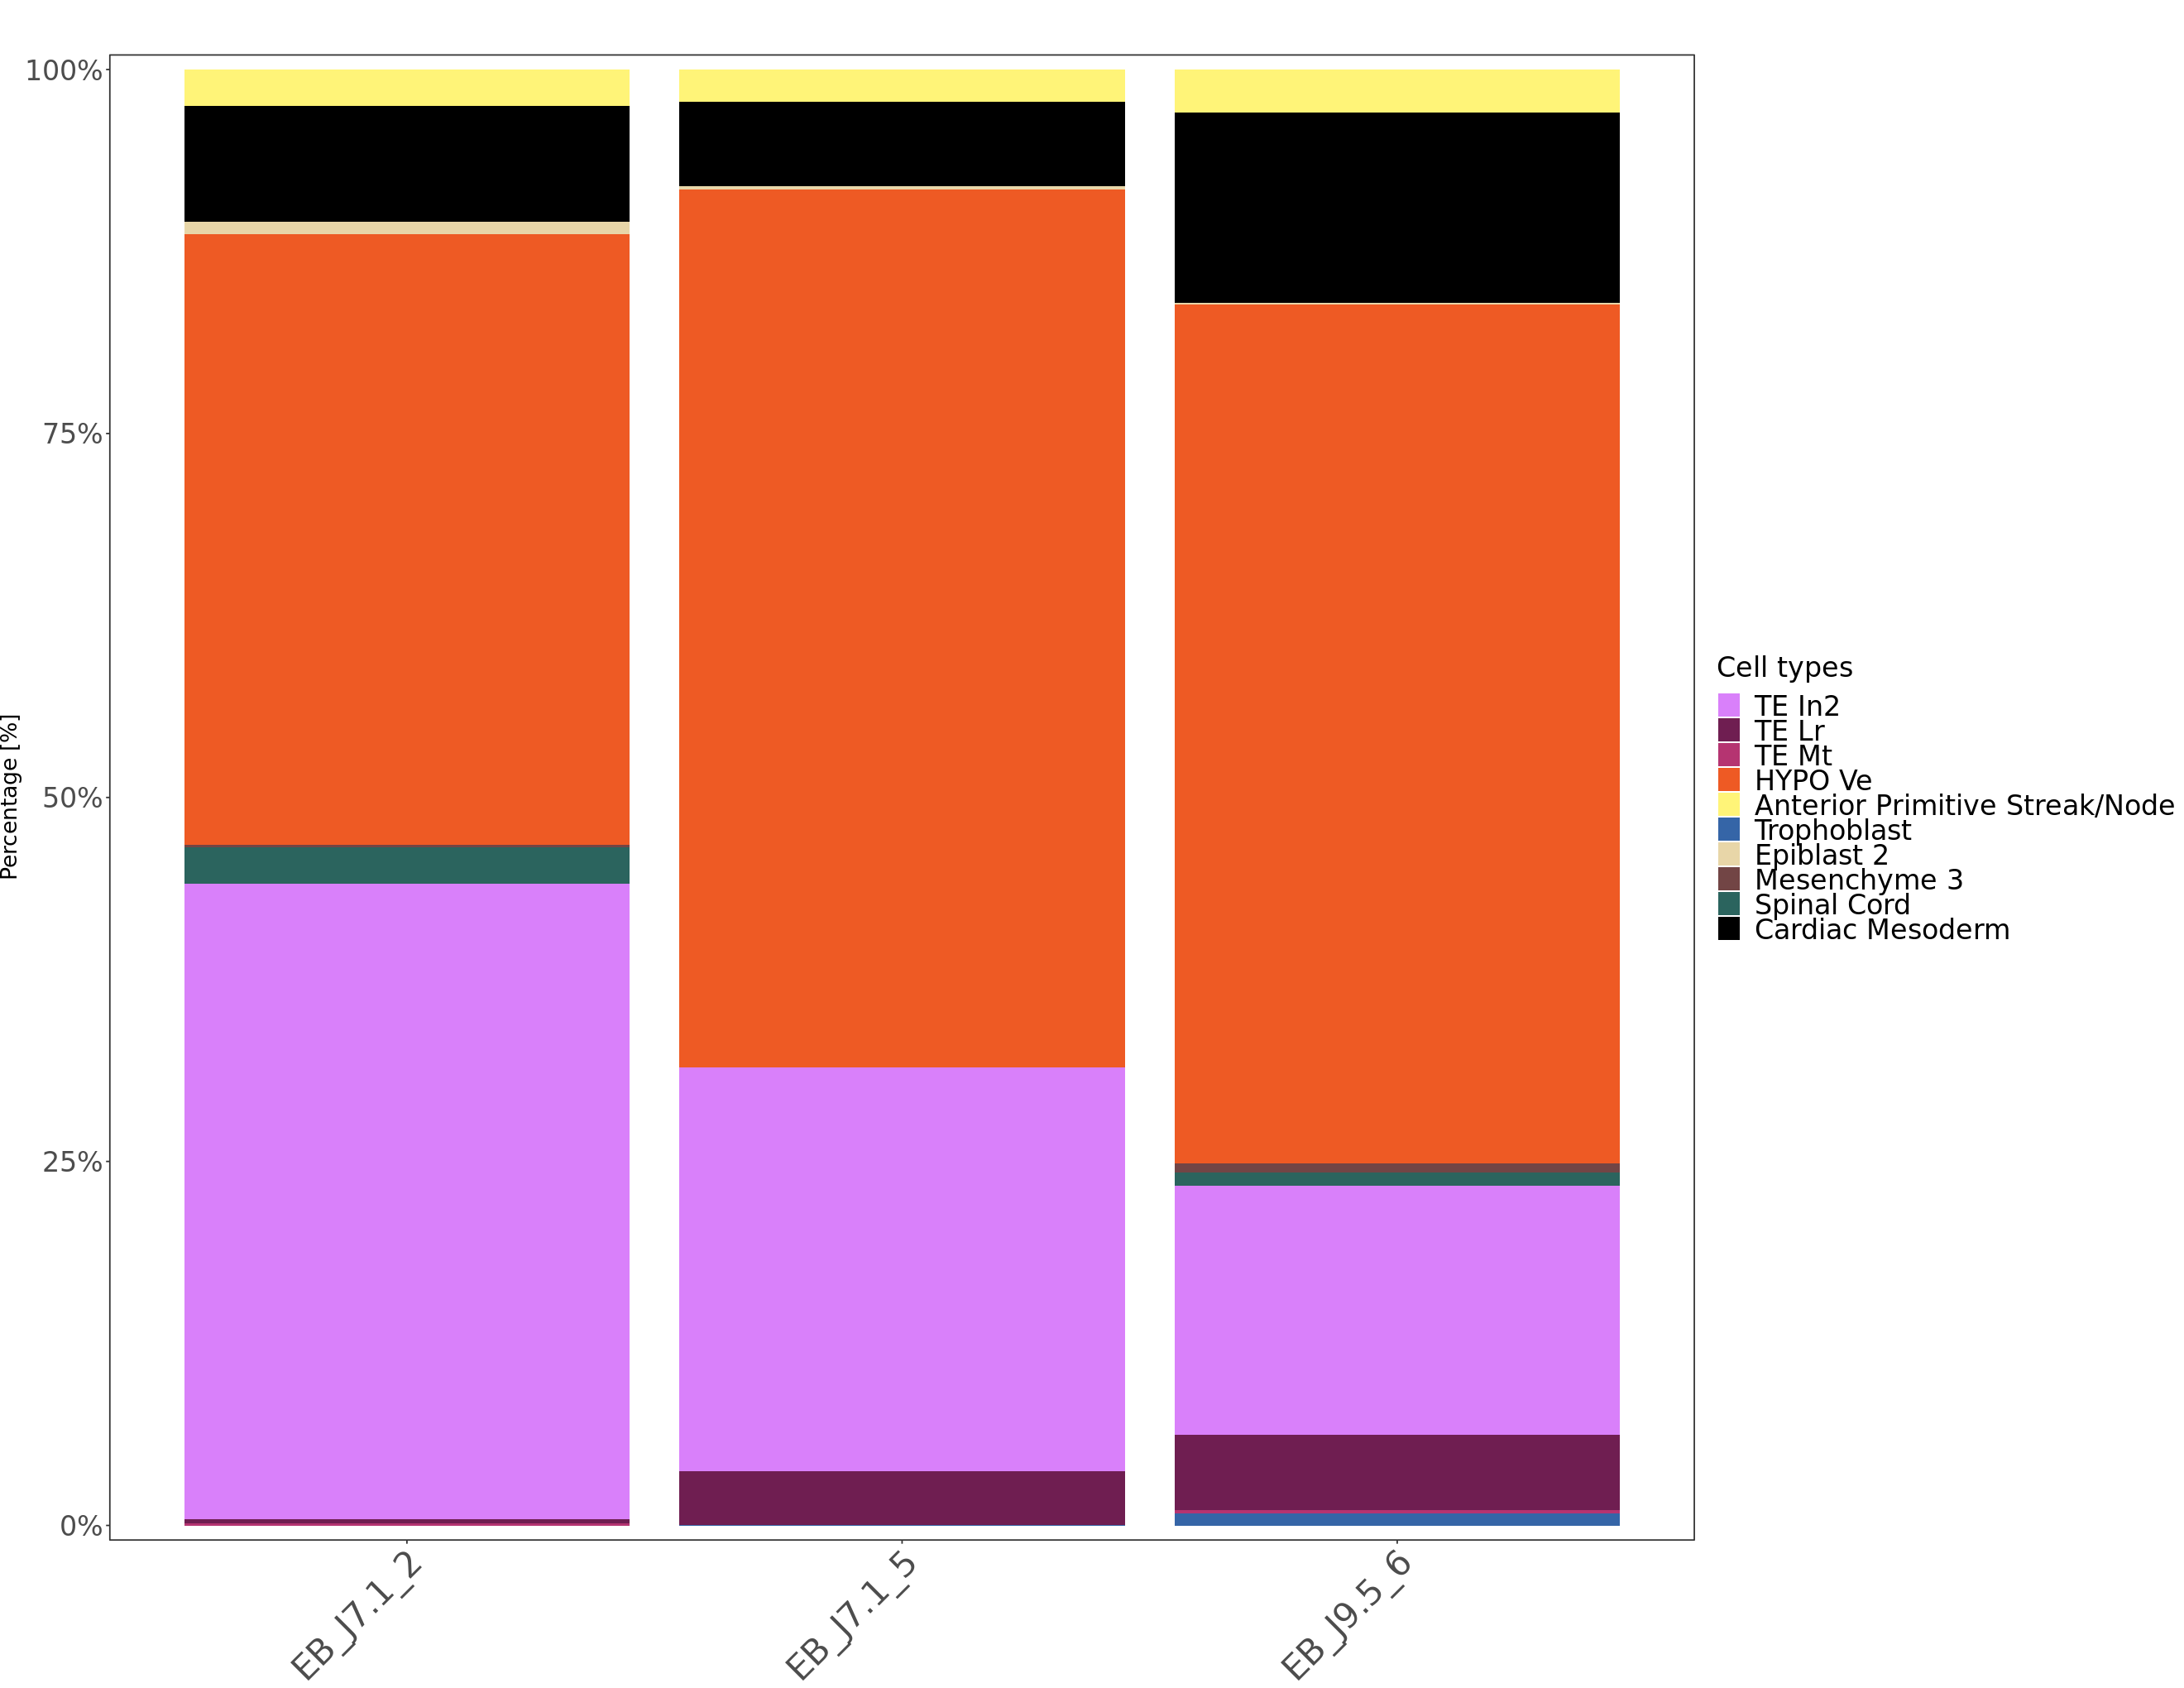

In [87]:
options(repr.plot.width = 22, repr.plot.height = 17, repr.plot.pointsize = 24)
plot <- ggplot(result_to_plot, aes(x=Sample, y=value, fill=name)) +
    geom_bar(position="fill", stat="identity") +
    scale_fill_manual(name = 'Cell types', values = colors_dutch) +
    scale_y_continuous(name = 'Percentage [%]', labels = scales::percent_format(), expand = c(0.01,0)) +
    coord_cartesian(clip = 'off') +
    theme_bw() +
    theme(
        legend.position = 'right',
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 20),
        text = element_text(size = 16),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_text(size = 13, hjust = 0.5, vjust = 3.5, face = "bold"),
        axis.title.x = element_blank(),
        axis.text.x = element_text(size = 25, angle = 45, hjust = 1, vjust = 1),
        axis.text.y = element_text(size = 20),
        plot.margin = margin(t = 40, r = 0, b = 0, l = 0, unit = 'pt')
    )

In [ ]:
ggsave(
  '/home/adufour/work/notebook/plots/bulk_esc/composition_esc.svg',
  plot,
  height = 18,
  width = 20
)

In [88]:
save.image(file = "/home/adufour/work/rds_storage/gastrulation/bulk_proportion_lingzhao.RData")